<a href="https://colab.research.google.com/github/joaorihan/EcoStep/blob/main/data-science/EcoStep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Global Solution Data Science**

Adriano Lopes rm:98574

João Antonio Rihan rm:99656

Rodrigo Fernandes Serafim rm:550816

In [ ]:
!pip install statsmodels
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregar o arquivo
file_path = '/content/br_mme_consumo_energia_eletrica_uf.csv.gz'
data = pd.read_csv(file_path)

# Exibir as primeiras linhas para verificar o carregamento
data.head()


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


In [ ]:
# Preencher valores ausentes em 'numero_consumidores'
data['numero_consumidores'] = data.groupby(['ano', 'mes', 'tipo_consumo'])['numero_consumidores']\
                                   .transform(lambda x: x.fillna(x.mean()))

# Preencher valores restantes com a média global por tipo de consumo
data['numero_consumidores'] = data.groupby('tipo_consumo')['numero_consumidores']\
                                   .transform(lambda x: x.fillna(x.mean()))

# Verificar se há valores ausentes restantes
print(f"Valores ausentes restantes: {data['numero_consumidores'].isna().sum()}")


Valores ausentes restantes: 12960


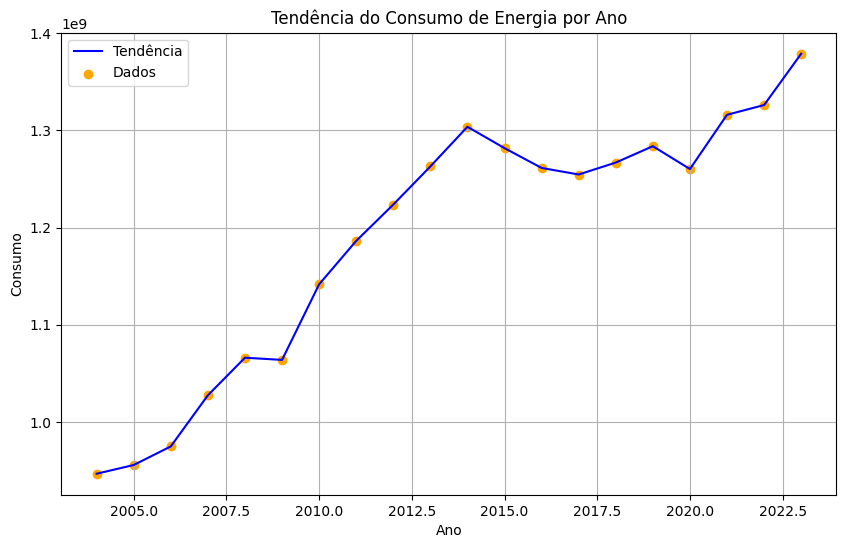

In [ ]:
# Agregar consumo por ano
annual_consumption = data.groupby('ano')['consumo'].sum().reset_index()

# Decomposição para extrair tendência
result = seasonal_decompose(annual_consumption['consumo'], period=1, model='additive', extrapolate_trend='freq')

# Gráfico da tendência
plt.figure(figsize=(10, 6))
plt.plot(annual_consumption['ano'], result.trend, label='Tendência', color='blue')
plt.scatter(annual_consumption['ano'], annual_consumption['consumo'], label='Dados', color='orange')
plt.title('Tendência do Consumo de Energia por Ano')
plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.legend()
plt.grid()
plt.show()


MAE: 41188551.23315811
RMSE: 48517619.21807315
R²: 0.864452974655669


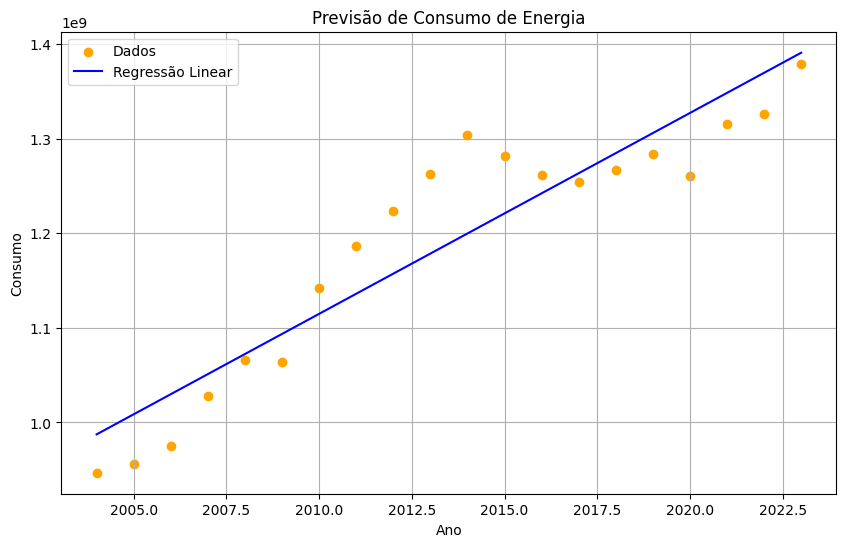

In [ ]:
# Regressão linear
X = annual_consumption['ano'].values.reshape(-1, 1)
y = annual_consumption['consumo'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Avaliação do modelo
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Gráfico de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='orange', label='Dados')
plt.plot(X, y_pred, color='blue', label='Regressão Linear')
plt.title('Previsão de Consumo de Energia')
plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.legend()
plt.grid()
plt.show()


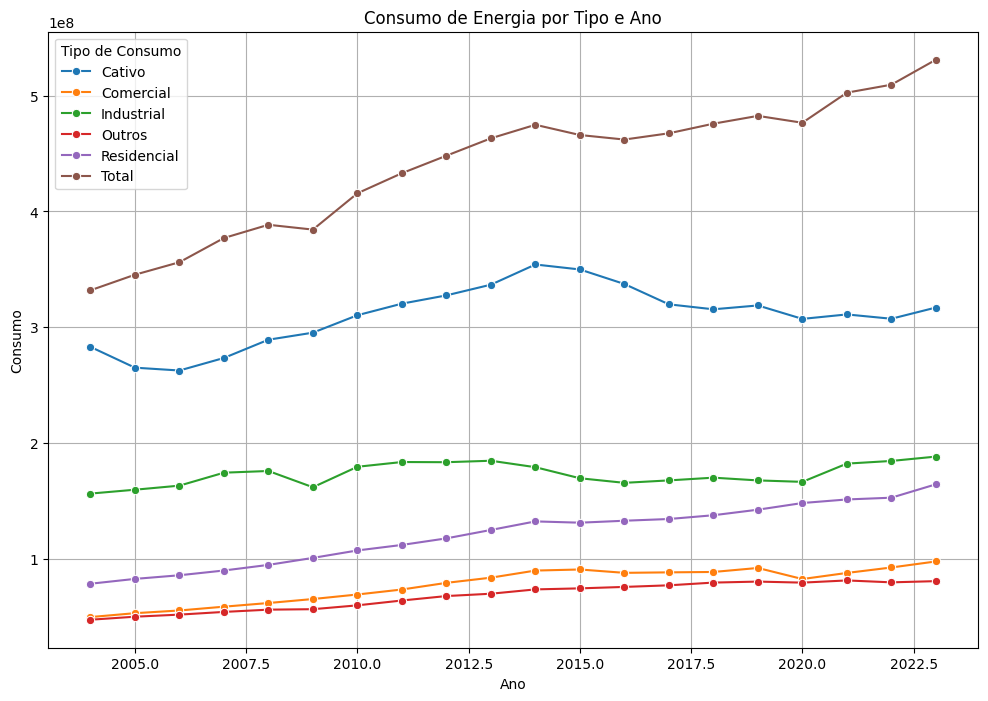

In [ ]:
# Agregar consumo por tipo e ano
consumption_by_type = data.groupby(['ano', 'tipo_consumo'])['consumo'].sum().reset_index()

# Gráfico
plt.figure(figsize=(12, 8))
sns.lineplot(data=consumption_by_type, x='ano', y='consumo', hue='tipo_consumo', marker='o')
plt.title('Consumo de Energia por Tipo e Ano')
plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.legend(title='Tipo de Consumo')
plt.grid()
plt.show()


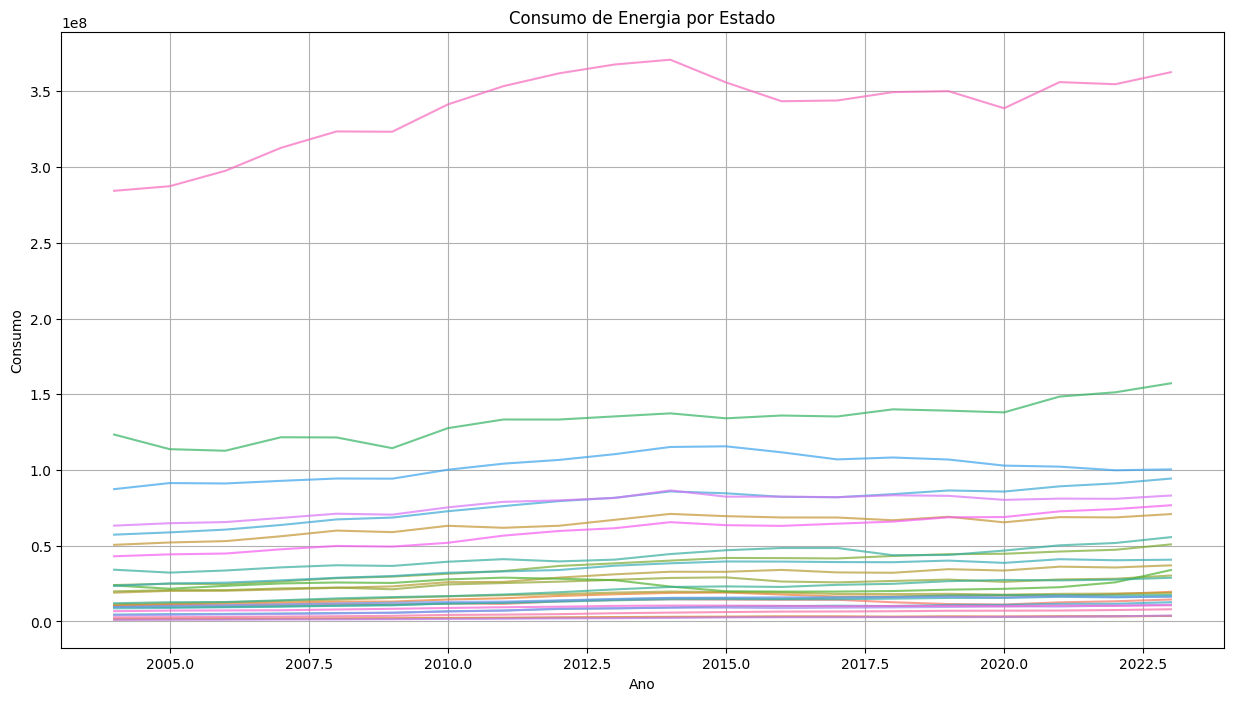

In [ ]:
# Agregar consumo por ano e estado (sigla_uf)
regional_consumption = data.groupby(['ano', 'sigla_uf'])['consumo'].sum().reset_index()

# Gráfico de linha por estado
plt.figure(figsize=(15, 8))
sns.lineplot(data=regional_consumption, x='ano', y='consumo', hue='sigla_uf', legend=False, alpha=0.7)
plt.title('Consumo de Energia por Estado')
plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.grid()
plt.show()


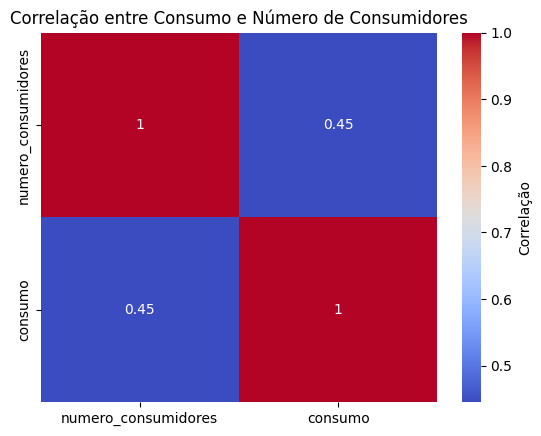

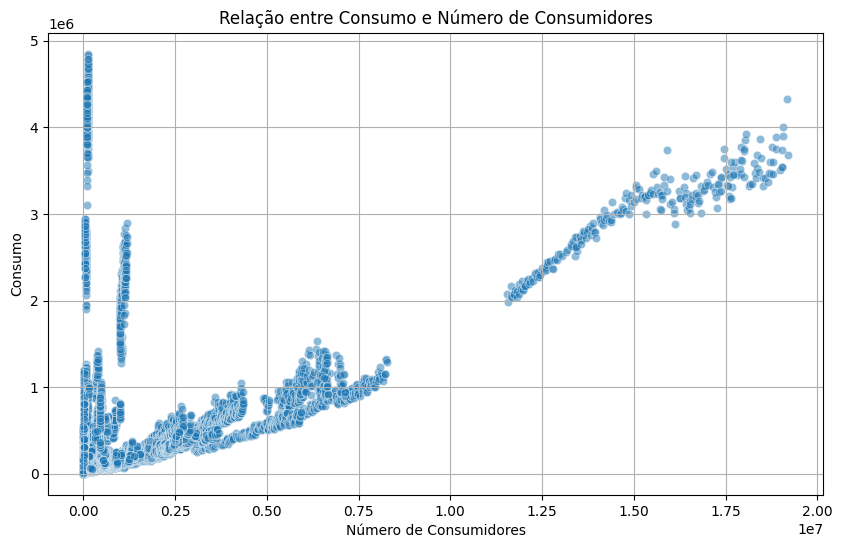

In [ ]:
# Calcular a correlação
correlation = data[['numero_consumidores', 'consumo']].corr()

# Exibir matriz de correlação
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlação'})
plt.title('Correlação entre Consumo e Número de Consumidores')
plt.show()

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='numero_consumidores', y='consumo', alpha=0.5)
plt.title('Relação entre Consumo e Número de Consumidores')
plt.xlabel('Número de Consumidores')
plt.ylabel('Consumo')
plt.grid()
plt.show()
